In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = randn(25)

(0.0, 0.5)

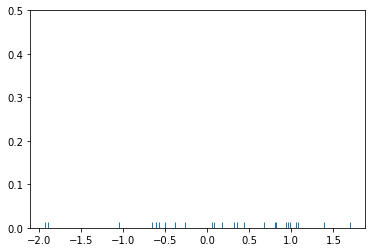

In [4]:
sns.rugplot(data)
plt.ylim(0, 0.5)

<AxesSubplot:>

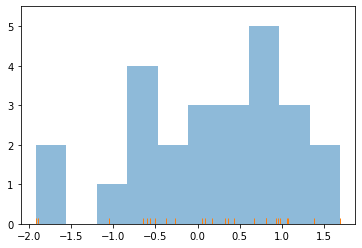

In [6]:
plt.hist(data, alpha = 0.5)
sns.rugplot(data)

(0.0, 1.0)

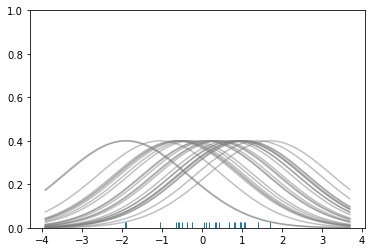

In [7]:
sns.rugplot(data)


x_min = data.min() - 2
x_max = data.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * data.std()) ** 5 / (3 * len(data))) ** 0.2

kernel_list = []

for d in data:
    kernel = stats.norm(d, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)

plt.ylim(0, 1)

Text(0.5, 1.0, 'Sum of the basis functions')

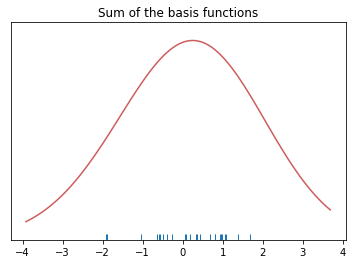

In [8]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(data)
plt.yticks([])
plt.title('Sum of the basis functions')

<AxesSubplot:ylabel='Density'>

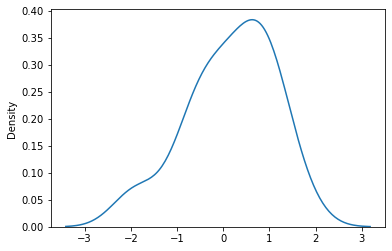

In [9]:
sns.kdeplot(data)

/home/jacob/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/jacob/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/jacob/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/jacob/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarnin

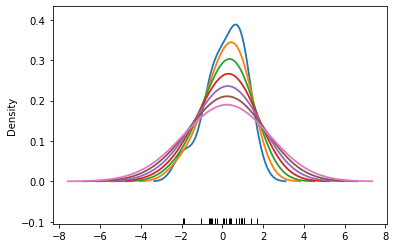

In [11]:
sns.rugplot(data, color = 'black')

for bw in np.arange(0.5, 2.01, 0.25):
    sns.kdeplot(data, bw = bw, lw = 1.8, label = bw)